### Tareas pendientes
14/05/2023
- Agregar titulos y subtitulos a los graficos 
- Copiar el codigo de SQL
- Cambiar nombre de variables de graficos
- Decidir que medida de dispersion usar
- Agregar dato de temperatura promedio de la ciudad
- Analisis y conclusiones
- Agregar debajo de cada grafico una tabla con los valores exactos.


# BikeSharing 2022

- Trip duration average and SD, for user type by months of the year, days of the weeks and hours.
- Trip count and SD, for user type by months of the year, days of the week and hours.
- Optional : Try to find a correlation between top start and ending stations with turistic areas.


### Import modules


In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime as dt

### Import csv file previously cleaned in MySQL


In [4]:
path = '2022_tripdata_v2.csv'

trips = pd.read_csv(path)

### Transform datatypes 

In [6]:
# Modify data types 
trips['start_datetime'] = pd.to_datetime(trips['start_datetime'], format='%Y-%m-%d %H:%M:%S')
trips['end_datetime'] = pd.to_datetime(trips['end_datetime'], format='%Y-%m-%d %H:%M:%S')


In [41]:
trips.head()

,ride_id,rideable_type,start_datetime,start_date,start_month,start_weekday,start_time,end_datetime,end_date,end_month,end_weekday,end_time,start_station_name,end_station_name,user_type,trip_duration,started_hour,day_type
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13,January,Thursday,11:59:47,2022-01-13 12:02:44,2022-01-13,January,Thursday,12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,2,11,Weekday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10,January,Monday,08:41:56,2022-01-10 08:46:17,2022-01-10,January,Monday,08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,4,8,Weekday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25,January,Tuesday,04:53:40,2022-01-25 04:58:01,2022-01-25,January,Tuesday,04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,4,4,Weekday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04,January,Tuesday,00:18:04,2022-01-04 00:33:00,2022-01-04,January,Tuesday,00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,14,0,Weekday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20,January,Thursday,01:31:10,2022-01-20 01:37:12,2022-01-20,January,Thursday,01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,6,1,Weekday


In [7]:
# Glimpse of the dataset
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440114 entries, 0 to 5440113
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   start_datetime      datetime64[ns]
 3   start_date          object        
 4   start_month         object        
 5   start_weekday       object        
 6   start_time          object        
 7   end_datetime        datetime64[ns]
 8   end_date            object        
 9   end_month           object        
 10  end_weekday         object        
 11  end_time            object        
 12  start_station_name  object        
 13  end_station_name    object        
 14  user_type           object        
 15  trip_duration       int64         
dtypes: datetime64[ns](2), int64(1), object(13)
memory usage: 664.1+ MB


### Summary values

In [58]:
summary = trips.describe()
summary

,trip_duration,started_hour
count,5440114.00,5440114.00
mean,16.40,14.23
std,29.81,5.02
min,2.00,0.00
25%,6.00,11.00
50%,10.00,15.00
75%,18.00,18.00
max,1440.00,23.00


In [59]:
summary_obj = pd.DataFrame(trips.describe(include=['object']))
summary_obj

,ride_id,rideable_type,start_date,start_month,start_weekday,start_time,end_date,end_month,end_weekday,end_time,start_station_name,end_station_name,user_type,day_type
count,5440114,5440114,5440114,5440114,5440114,5440114,5440114,5440114,5440114,5440114,4224063,4224063,5440114,5440114
unique,5440114,3,365,12,7,86328,366,12,7,86326,1533,1573,2,2
top,230D014A5158BD82,electric_bike,2022-07-09,July,Saturday,17:05:56,2022-07-09,July,Saturday,17:27:14,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,member,Weekday
freq,1,2747979,34798,791787,880547,214,34703,791848,878498,204,69161,70438,3199278,3814264


### Trips count by month grouped by usertype

Text(0.1, 1.05, 'Ride Count by Start Month and User Type')

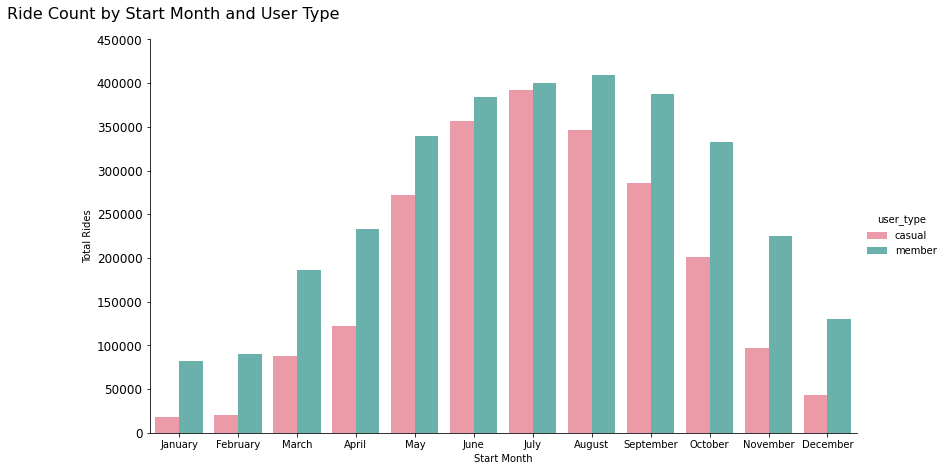

In [97]:
g = sns.catplot(data=trips, kind="count", x="start_month", hue="user_type", 
                palette='husl', alpha=0.8, height=6, aspect = 1.8)
g.set(xlabel="Start Month", ylabel="Total Rides")
g.set_xticklabels(ha="center", fontsize=10)
g.set_yticklabels(fontsize=12)
g.set_titles(fontsize=14)
g.fig.suptitle("Ride Count by Start Month and User Type", fontsize=16, x=0.1, y=1.05)

In [68]:
# Define the desired order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create the pivot table with the specified month order
trips_count_pv = pd.pivot_table(trips, values='ride_id', index='user_type', columns='start_month', aggfunc='count', fill_value=0)
trips_count_pv = trips_count_pv.reindex(columns=month_order)

# Print the pivot table
trips_count_pv


start_month,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
casual,17883,20695,87335,122630,271621,356948,391764,345850,285946,200720,96625,42819
member,81706,89803,185711,233094,339653,384600,400023,409223,387155,333012,225662,129636


### Trips count by weekday and grouped by user type

In [18]:
# To plot average for each day of the week, we need to make a groupby to calculate the count and mean. 

days = pd.DataFrame(trips.groupby(['user_type', 'start_weekday', 'start_date']).size().reset_index(name='count'))
days

,user_type,start_weekday,start_date,count
0,casual,Friday,2022-01-07,392
1,casual,Friday,2022-01-14,908
2,casual,Friday,2022-01-21,783
3,casual,Friday,2022-01-28,277
4,casual,Friday,2022-02-04,463
...,...,...,...,...
725,member,Wednesday,2022-11-30,5954
726,member,Wednesday,2022-12-07,8235
727,member,Wednesday,2022-12-14,3265
728,member,Wednesday,2022-12-21,4586


### Average trips by day and user type

Text(0.1, 1.05, 'Average Trip by Day and User Type')

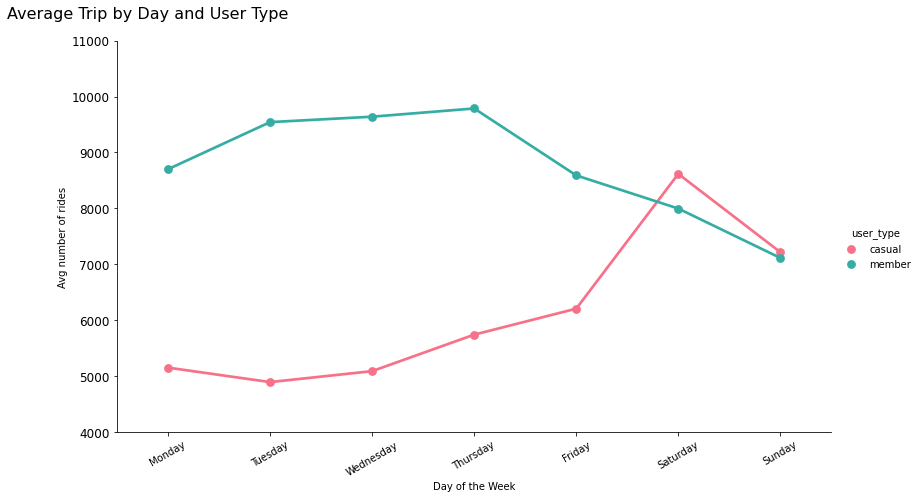

In [99]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = sns.catplot(data=days, kind='point', x='start_weekday', y='count', hue='user_type', ci = None,
                order = order, height=6, aspect=1.8, alpha=0.9, palette='husl')
x.set(xlabel='Day of the Week', ylabel='Avg number of rides')
x.set_xticklabels(rotation=30, ha='center', fontsize=10)
x.set_yticklabels(fontsize=12)
x.set_titles(fontsize=14)
x.fig.suptitle("Average Trip by Day and User Type", fontsize=16, x=0.1, y=1.05)

In [75]:
# Make a pivot table to see the aggregation
pivot_count_byday = pd.pivot_table(days, values='count', index='user_type', columns='start_weekday', aggfunc='mean')
pivot_count_byday.reindex(columns=order).round(2)


start_weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
user_type,,,,,,,
casual,5153.94,4895.69,5091.35,5743.52,6208.08,8616.89,7217.83
member,8700.83,9542.23,9639.25,9786.37,8589.98,7997.21,7114.92


### Average trip count by hours of the day

In [12]:
#Extracting hour from start_datetime

trips['started_hour'] = trips['start_datetime'].dt.hour
trips.head()

,ride_id,rideable_type,start_datetime,start_date,start_month,start_weekday,start_time,end_datetime,end_date,end_month,end_weekday,end_time,start_station_name,end_station_name,user_type,trip_duration,started_hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13,January,Thursday,11:59:47,2022-01-13 12:02:44,2022-01-13,January,Thursday,12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,2,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10,January,Monday,08:41:56,2022-01-10 08:46:17,2022-01-10,January,Monday,08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,4,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25,January,Tuesday,04:53:40,2022-01-25 04:58:01,2022-01-25,January,Tuesday,04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,4,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04,January,Tuesday,00:18:04,2022-01-04 00:33:00,2022-01-04,January,Tuesday,00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,14,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20,January,Thursday,01:31:10,2022-01-20 01:37:12,2022-01-20,January,Thursday,01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,6,1


In [13]:
#Create pivot table with started_hours count

hours =pd.DataFrame(trips.groupby(['user_type', 'start_weekday', 'started_hour']).size().reset_index(name='count'))
hours

,user_type,start_weekday,started_hour,count
0,casual,Friday,0,5310
1,casual,Friday,1,3209
2,casual,Friday,2,1857
3,casual,Friday,3,1175
4,casual,Friday,4,852
...,...,...,...,...
331,member,Wednesday,19,32848
332,member,Wednesday,20,23177
333,member,Wednesday,21,17640
334,member,Wednesday,22,12711


In [14]:
#Adding a categorical column indicating weekday or weekend
hours['day_type'] = hours['start_weekday'].apply(lambda x: 'Weekday' if x in 
                                                 ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')
hours

,user_type,start_weekday,started_hour,count,day_type
0,casual,Friday,0,5310,Weekday
1,casual,Friday,1,3209,Weekday
2,casual,Friday,2,1857,Weekday
3,casual,Friday,3,1175,Weekday
4,casual,Friday,4,852,Weekday
...,...,...,...,...,...
331,member,Wednesday,19,32848,Weekday
332,member,Wednesday,20,23177,Weekday
333,member,Wednesday,21,17640,Weekday
334,member,Wednesday,22,12711,Weekday


Text(0.1, 1.05, 'Average Number of Rides by Day Type')

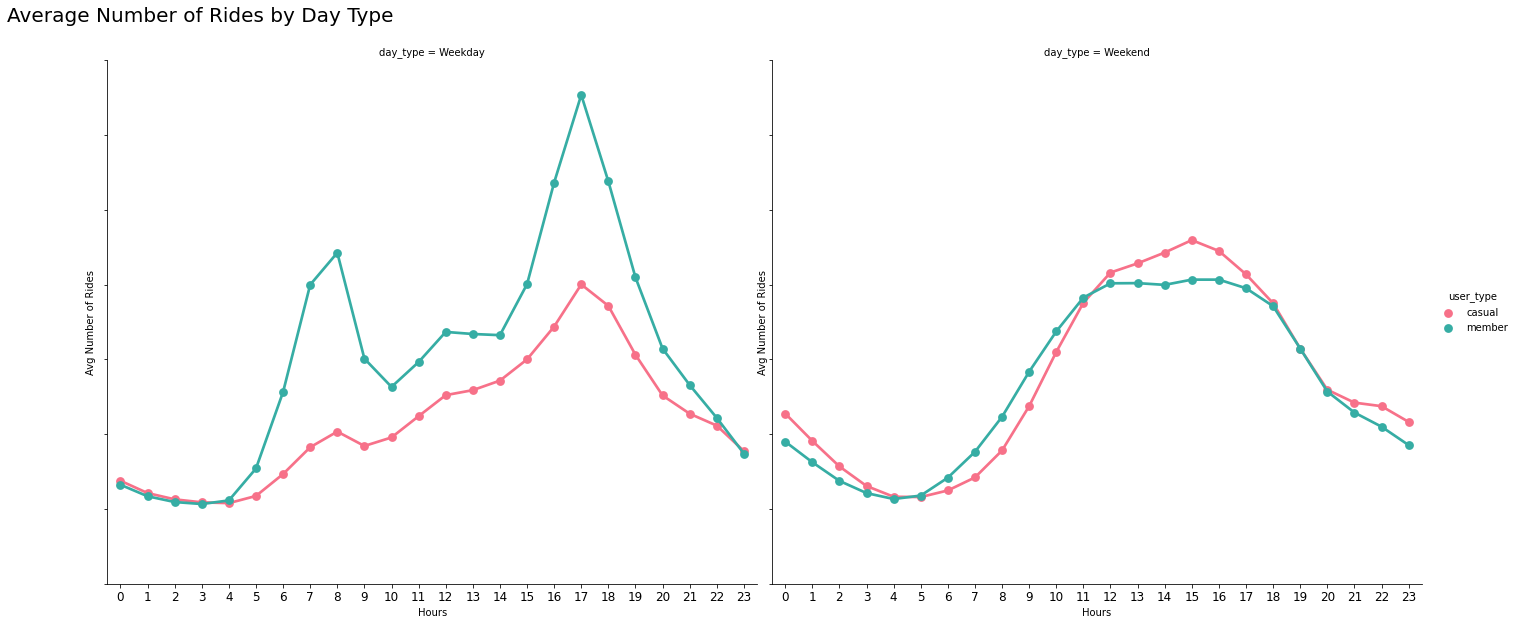

In [131]:
# Calculate the average trip count for each user type and started hour separately for weekdays and weekends.
h = sns.catplot(data=hours, kind='point', x='started_hour', y='count', hue='user_type',col='day_type', ci= None,
                height=8, aspect=1.2, alpha=0.9, palette='husl')
h.set(xlabel='Hours', ylabel='Avg Number of Rides')
h.set_xticklabels(ha='center', fontsize=12)
h.set_yticklabels(fontsize=12)
h.set_titles(fontsize=14)
h.fig.suptitle("Average Number of Rides by Day Type", fontsize=20, x=0.1, y=1.05)


In [81]:
#Make a pivot table to see the agregation
pivot_count_byhour = pd.pivot_table(hours, values='count', index='started_hour', columns=['day_type','user_type'], aggfunc='mean')
#pivot_count_byhour.reindex(columns=order).round(2)
pivot_count_byhour.round(2)

day_type      Weekday           Weekend         
user_type      casual   member   casual   member
started_hour                                    
0             3781.20  3247.60 12774.00  9013.00
1             2134.00  1707.80  9110.00  6259.00
2             1293.60   936.80  5694.50  3763.50
3              893.20   669.80  3078.00  2131.50
4              787.40  1150.60  1641.50  1339.50
5             1749.00  5420.60  1604.00  1800.00
6             4678.80 15655.60  2485.00  4196.00
7             8262.80 29994.60  4225.00  7649.00
8            10356.20 34278.40  7835.50 12338.50
9             8432.40 20112.60 13764.50 18371.50
10            9573.00 16331.40 21011.50 23755.50
11           12417.20 19659.80 27586.00 28280.50
12           15230.40 23686.00 31628.50 30187.50
13           15899.00 23408.00 32856.00 30211.50
14           17175.00 23253.60 34302.50 29979.50
15           20014.20 30071.80 35966.00 30680.00
16           24405.20 43668.80 34513.50 30679.50
17           30037.40 55386.60 31386.00 29529.50
18           27171.20 43817.80 27517.00 27126.50
19           20629.20 30982.00 21450.50 21462.50
20           15189.20 21456.40 15952.00 15707.50
21           12748.00 16582.00 14227.50 12901.00
22           11155.20 12188.80 13753.50 11007.00
23            7750.00  7422.60 11648.50  8544.50

### Trip Duration by Month

Text(0.1, 1.05, 'Average Trip Duration By User Type')

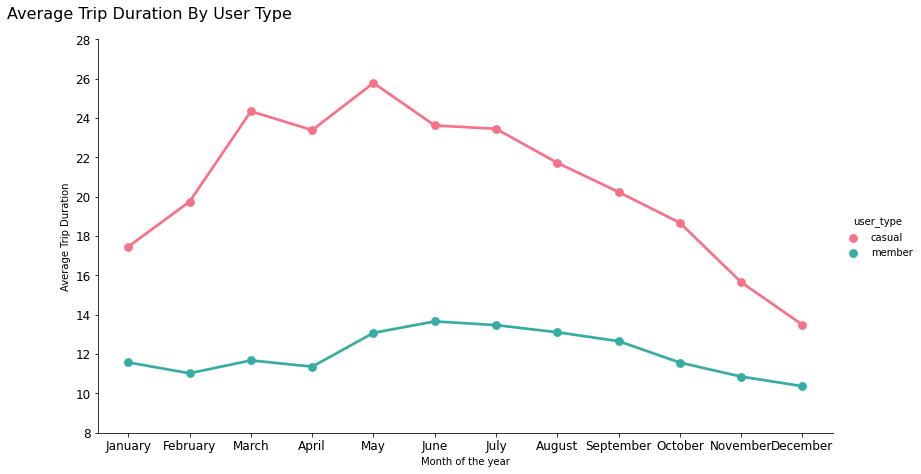

In [127]:
# Trip duration by user type and month

u = sns.catplot(data=trips, kind='point', x='start_month', y='trip_duration', hue='user_type',
               ci=None, height=6, aspect=1.8, alpha=0.9, palette='husl')
u.set(xlabel='Month of the year', ylabel='Average Trip Duration')
u.set_xticklabels(ha='center', fontsize=12)
u.set_yticklabels(fontsize=12)
u.set_titles(fontsize=14)
u.fig.suptitle("Average Trip Duration By User Type", fontsize=16, x=0.1, y=1.05)

In [87]:
#Make a pivot table
pivot_dur_bymonth = pd.pivot_table(trips, values='trip_duration', index='user_type', columns='start_month', aggfunc='mean')
pivot_dur_bymonth.reindex(columns=month_order).round(2)

start_month,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
casual,17.46,19.75,24.35,23.39,25.79,23.62,23.46,21.72,20.24,18.68,15.65,13.49
member,11.58,11.03,11.68,11.36,13.08,13.66,13.47,13.11,12.66,11.57,10.86,10.37


### Trip Duration by Day

Text(0.1, 1.05, 'Average Trip Duration By Day And User Type')

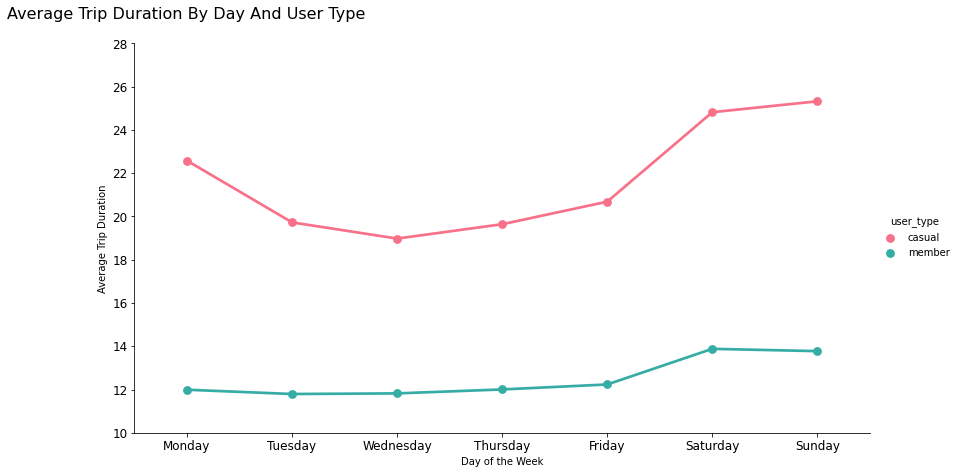

In [128]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = sns.catplot(data=trips, kind='point', x='start_weekday', y='trip_duration', hue='user_type',
               ci=None, order=order, height=6, aspect=1.8, alpha=0.9, palette='husl')
y.set(xlabel='Day of the Week', ylabel='Average Trip Duration')
y.set_xticklabels(ha='center', fontsize=12)
y.set_yticklabels(fontsize=12)
y.set_titles(fontsize=14)
y.fig.suptitle("Average Trip Duration By Day And User Type", fontsize=16, x=0.1, y=1.05)

In [89]:
#Make a pivot table

pivot_dur_byday = pd.pivot_table(trips, values='trip_duration', index='user_type', columns='start_weekday', aggfunc='mean')
pivot_dur_byday.reindex(columns=order).round(2)

start_weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
user_type,,,,,,,
casual,22.58,19.73,18.98,19.64,20.68,24.82,25.32
member,11.99,11.79,11.82,12.00,12.23,13.88,13.77


### Trip duration by hour of the day

In [35]:
#Adding a categorical column indicating weekday or weekend
trips['day_type'] = trips['start_weekday'].apply(lambda x: 'Weekday' if x in 
                                                 ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')
trips.head()

,ride_id,rideable_type,start_datetime,start_date,start_month,start_weekday,start_time,end_datetime,end_date,end_month,end_weekday,end_time,start_station_name,end_station_name,user_type,trip_duration,started_hour,day_type
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13,January,Thursday,11:59:47,2022-01-13 12:02:44,2022-01-13,January,Thursday,12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,2,11,Weekday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10,January,Monday,08:41:56,2022-01-10 08:46:17,2022-01-10,January,Monday,08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,4,8,Weekday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25,January,Tuesday,04:53:40,2022-01-25 04:58:01,2022-01-25,January,Tuesday,04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,4,4,Weekday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04,January,Tuesday,00:18:04,2022-01-04 00:33:00,2022-01-04,January,Tuesday,00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,14,0,Weekday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20,January,Thursday,01:31:10,2022-01-20 01:37:12,2022-01-20,January,Thursday,01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,6,1,Weekday


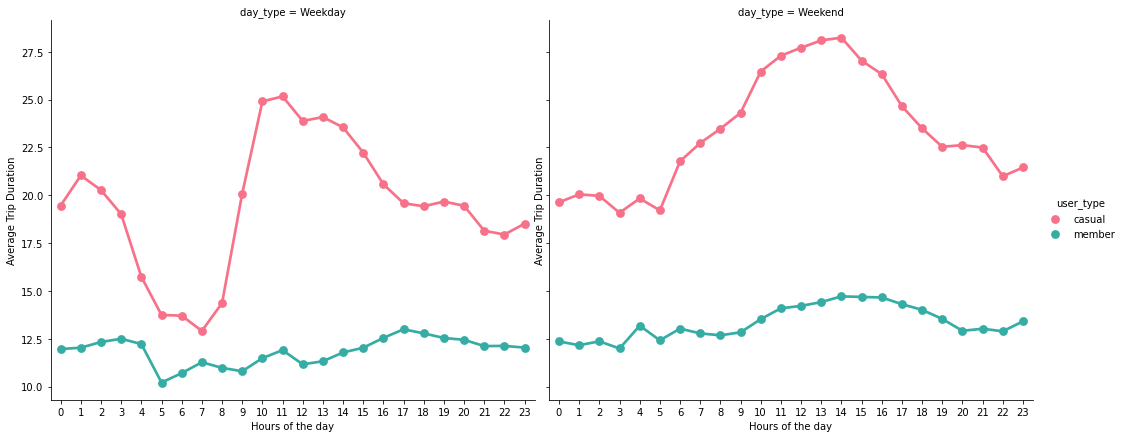

In [37]:
z = sns.catplot(data=trips, kind='point', x='started_hour', y='trip_duration', hue='user_type', col='day_type',
               ci=None, height=6, aspect=1.2, alpha=0.9, palette='husl')
z.set(xlabel='Hours of the day', ylabel='Average Trip Duration')
z.set_xticklabels(ha='center')

In [91]:
#Make a pivot table to see the aggregation
pivot_dur_byhour = pd.pivot_table(trips, values='trip_duration', index='started_hour', columns=['day_type', 'user_type'], aggfunc='mean')
pivot_dur_byhour.round(2)

day_type     Weekday        Weekend       
user_type     casual member  casual member
started_hour                              
0              19.46  11.96   19.63  12.36
1              21.03  12.03   20.05  12.16
2              20.27  12.33   19.97  12.36
3              19.01  12.50   19.08  11.99
4              15.73  12.22   19.83  13.18
5              13.74  10.21   19.21  12.42
6              13.70  10.70   21.78  13.03
7              12.91  11.27   22.73  12.78
8              14.36  10.98   23.48  12.68
9              20.08  10.80   24.31  12.83
10             24.90  11.48   26.47  13.52
11             25.17  11.90   27.30  14.09
12             23.88  11.16   27.71  14.21
13             24.09  11.32   28.10  14.42
14             23.55  11.78   28.24  14.72
15             22.23  12.03   27.04  14.68
16             20.57  12.54   26.33  14.66
17             19.58  12.99   24.66  14.30
18             19.42  12.78   23.50  14.01
19             19.67  12.54   22.53  13.53
20             19.45  12.44   22.62  12.91
21             18.14  12.11   22.49  13.02
22             17.95  12.13   20.99  12.89
23             18.51  12.03   21.45  13.41

### Avarage temperature (°C) on Chicago City by Month on 2022

In [69]:
# This information was stracted from National Wheater Reports to add context to insights

|              | January | February | March | April | May  | June | July | August | September | October | November | December |
|--------------|---------|----------|-------|-------|------|------|------|--------|-----------|---------|----------|----------|
| Avg Temp(°C) | -4      | -1       | 3     | 9     | 15   | 22   | 24   | 23     | 19        |  12     | 5        | -1       |
